In [28]:
import nltk 
import pandas as pd 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential

from pickle import load
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import warnings
warnings.filterwarnings("ignore")

import unicodedata
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\danus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
df = pd.read_excel('./tweet data/stock_tweets_selected_automobile.xlsx')

In [9]:
df.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40699 entries, 0 to 40698
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          40699 non-null  object
 1   Tweet         40699 non-null  object
 2   Stock Name    40699 non-null  object
 3   Company Name  40699 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [11]:
df.describe()

,Date,Tweet,Stock Name,Company Name
count,40699,40699,40699,40699
unique,40132,40135,4,4
top,2021-11-11 01:54:37+00:00,$TSLA will triple in 2022 🚀🌕,TSLA,"Tesla, Inc."
freq,3,25,37422,37422


In [12]:
df['Stock Name'].value_counts()

Stock Name
TSLA    37422
NIO      3021
XPEV      225
F          31
Name: count, dtype: int64

<Axes: xlabel='Stock Name'>

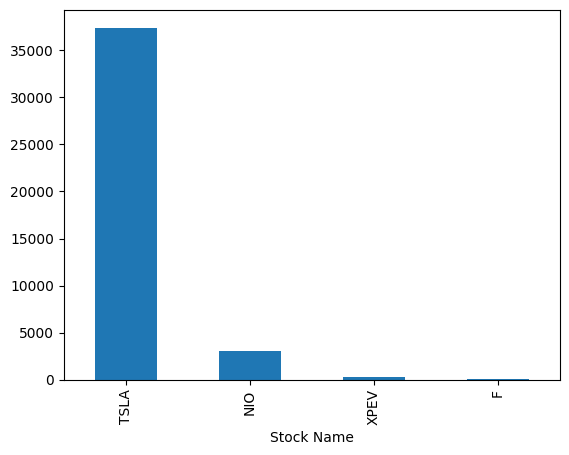

In [13]:
df['Stock Name'].value_counts().plot(kind='bar')

In [17]:
df['Company Name'].value_counts()

Company Name
Tesla, Inc.           37422
NIO Inc.               3021
XPeng Inc.              225
Ford Motor Company       31
Name: count, dtype: int64

In [30]:
analyzer = SentimentIntensityAnalyzer()

In [31]:
df['Sentiment'] = df['Tweet'].apply(lambda text: analyzer.polarity_scores(text)['compound'])


mean_sentiment = df['Sentiment'].mean()
std_sentiment = df['Sentiment'].std()
df['Z-Score'] = (df['Sentiment'] - mean_sentiment) / std_sentiment


threshold = 2.0

anomalies = df[df['Z-Score'].abs() > threshold]

print("Sentiment Analysis Results:")
print(df)

print("\nAnomalies:")
print(anomalies)

Sentiment Analysis Results:
                            Date  \
0      2022-09-29 23:41:16+00:00   
1      2022-09-29 23:24:43+00:00   
2      2022-09-29 23:18:08+00:00   
3      2022-09-29 22:40:07+00:00   
4      2022-09-29 22:27:05+00:00   
...                          ...   
40694  2021-10-07 17:11:57+00:00   
40695  2021-10-04 17:05:59+00:00   
40696  2021-10-01 04:43:41+00:00   
40697  2021-10-01 00:03:32+00:00   
40698  2021-09-30 10:22:52+00:00   

                                                   Tweet Stock Name  \
0      Mainstream media has done an amazing job at br...       TSLA   
1      Tesla delivery estimates are at around 364k fr...       TSLA   
2      3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3      @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4      @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   
...                                                  ...        ...   
40694  Some of the fastest growing tech st

In [32]:
df.head()

,Date,Tweet,Stock Name,Company Name,Sentiment,Z-Score
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,-0.233006
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000,-0.405396
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960,0.255584
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,-2.095361
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750,-2.359307


In [2]:
df.tail()

NameError: name 'df' is not defined

In [1]:
# Word Cloud for Positive, Neutral, and Negative Sentiments
def plot_wordcloud(sentiment):
    words = ' '.join(df[df['Sentiment'] == sentiment]['Tweet'])
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

plot_wordcloud('Positive')
plot_wordcloud('Neutral')
plot_wordcloud('Negative')

NameError: name 'df' is not defined

In [18]:
sent_df = df.copy()
sent_df["sentiment_score"] = ''
sent_df["Negative"] = ''
sent_df["Neutral"] = ''
sent_df["Positive"] = ''
sent_df.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",,,,
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",,,,
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",,,,
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",,,,
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",,,,


In [22]:
tweet = df['Tweet']

In [23]:
tweet

0        Mainstream media has done an amazing job at br...
1        Tesla delivery estimates are at around 364k fr...
2        3/ Even if I include 63.0M unvested RSUs as of...
3        @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...
4        @RealDanODowd @Tesla Stop trying to kill kids,...
                               ...                        
40694    Some of the fastest growing tech stocks on the...
40695    With earnings on the horizon, here is a quick ...
40696    Our record delivery results are a testimony of...
40697    We delivered 10,412 Smart EVs in Sep 2021, rea...
40698    Why can XPeng P5 deliver outstanding performan...
Name: Tweet, Length: 40699, dtype: object

In [24]:
sent_df.T

,0,1,2,3,4,5,6,7,8,9,...,40689,40690,40691,40692,40693,40694,40695,40696,40697,40698
Date,2022-09-29 23:41:16+00:00,2022-09-29 23:24:43+00:00,2022-09-29 23:18:08+00:00,2022-09-29 22:40:07+00:00,2022-09-29 22:27:05+00:00,2022-09-29 22:25:53+00:00,2022-09-29 22:24:22+00:00,2022-09-29 22:23:54+00:00,2022-09-29 22:23:28+00:00,2022-09-29 22:15:01+00:00,...,2021-10-14 05:45:14+00:00,2021-10-13 16:47:19+00:00,2021-10-12 00:49:51+00:00,2021-10-11 03:51:36+00:00,2021-10-09 00:18:25+00:00,2021-10-07 17:11:57+00:00,2021-10-04 17:05:59+00:00,2021-10-01 04:43:41+00:00,2021-10-01 00:03:32+00:00,2021-09-30 10:22:52+00:00
Tweet,Mainstream media has done an amazing job at br...,Tesla delivery estimates are at around 364k fr...,3/ Even if I include 63.0M unvested RSUs as of...,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,"@RealDanODowd @Tesla Stop trying to kill kids,...",@RealDanODowd @Tesla This is you https://t.co/...,For years @WholeMarsBlog viciously silenced @T...,$NIO just because I'm down money doesn't mean ...,50 likes for some $SPY $TSLA charts to study!\...,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,...,🐳 🚨Whale Watchlist🚨🐳\n\n🌊@SharkofTraders Follo...,XPeng P7 tops Sept sales among new EV makers i...,Glocks Watch (1/2)\n\n$F 15.5c &gt; 15.36 | 14...,"NIO reached 100,000 vehicle rolled off the pro...","Update on Apple, Tesla, Nio, $QQQ, $SPY, ROKU,...",Some of the fastest growing tech stocks on the...,"With earnings on the horizon, here is a quick ...",Our record delivery results are a testimony of...,"We delivered 10,412 Smart EVs in Sep 2021, rea...",Why can XPeng P5 deliver outstanding performan...
Stock Name,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,...,XPEV,XPEV,XPEV,XPEV,XPEV,XPEV,XPEV,XPEV,XPEV,XPEV
Company Name,"Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.",...,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.
sentiment_score,,,,,,,,,,,...,,,,,,,,,,
Negative,,,,,,,,,,,...,,,,,,,,,,
Neutral,,,,,,,,,,,...,,,,,,,,,,
Positive,,,,,,,,,,,...,,,,,,,,,,


In [26]:
%%time


sentiment_analyzer = SentimentIntensityAnalyzer()

for indx, row in sent_df.iterrows():
    try:
        sentence_i = unicodedata.normalize('NFKD', row['Tweet'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        sent_df.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
        sent_df.at[indx, 'Negative'] = sentence_sentiment['neg']
        sent_df.at[indx, 'Neutral'] = sentence_sentiment['neu']
        sent_df.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print(sent_df.loc[indexx, 'Tweet'])
        print(indx)
        break


CPU times: total: 8.12 s
Wall time: 9.97 s


In [27]:
sent_df.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,0.125,0.763,0.113
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0,0.0,1.0,0.0
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.296,0.0,0.954,0.046
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,0.273,0.59,0.137
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.875,0.526,0.474,0.0


In [34]:

mean_sentiment = sent_df['sentiment_score'].mean()
std_sentiment = sent_df['sentiment_score'].std()
sent_df['Z-Score'] = (sent_df['sentiment_score'] - mean_sentiment) / std_sentiment

threshold = 2.0

anomalies = sent_df[sent_df['Z-Score'].abs() > threshold]

print("Sentiment Analysis Results:")
print(sent_df)

print("\nAnomalies:")
print(anomalies)

Sentiment Analysis Results:
                            Date  \
0      2022-09-29 23:41:16+00:00   
1      2022-09-29 23:24:43+00:00   
2      2022-09-29 23:18:08+00:00   
3      2022-09-29 22:40:07+00:00   
4      2022-09-29 22:27:05+00:00   
...                          ...   
40694  2021-10-07 17:11:57+00:00   
40695  2021-10-04 17:05:59+00:00   
40696  2021-10-01 04:43:41+00:00   
40697  2021-10-01 00:03:32+00:00   
40698  2021-09-30 10:22:52+00:00   

                                                   Tweet Stock Name  \
0      Mainstream media has done an amazing job at br...       TSLA   
1      Tesla delivery estimates are at around 364k fr...       TSLA   
2      3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3      @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4      @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   
...                                                  ...        ...   
40694  Some of the fastest growing tech st

In [40]:
sent_df['Date'] = pd.to_datetime(sent_df['Date'])
print(sent_df.head())
sent_df['Date'] = sent_df['Date'].dt.date
print(sent_df['Date'].head())

        Date                                              Tweet Stock Name  \
0 2022-09-29  Mainstream media has done an amazing job at br...       TSLA   
1 2022-09-29  Tesla delivery estimates are at around 364k fr...       TSLA   
2 2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3 2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4 2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   

  Company Name sentiment_score Negative Neutral Positive   Z-Score  
0  Tesla, Inc.          0.0772    0.125   0.763    0.113 -0.233445  
1  Tesla, Inc.             0.0      0.0     1.0      0.0 -0.405746  
2  Tesla, Inc.           0.296      0.0   0.954    0.046  0.254891  
3  Tesla, Inc.         -0.7568    0.273    0.59    0.137 -2.094836  
4  Tesla, Inc.          -0.875    0.526   0.474      0.0 -2.358645  
0    2022-09-29
1    2022-09-29
2    2022-09-29
3    2022-09-29
4    2022-09-29
Name: Date, dtype: object


In [41]:
sent_df.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive,Z-Score
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,0.125,0.763,0.113,-0.233445
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0,0.0,1.0,0.0,-0.405746
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.296,0.0,0.954,0.046,0.254891
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,0.273,0.59,0.137,-2.094836
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.875,0.526,0.474,0.0,-2.358645


In [56]:
sent_df.dtypes

Date               object
Tweet              object
Stock Name         object
Company Name       object
sentiment_score    object
Negative           object
Neutral            object
Positive           object
Z-Score            object
dtype: object

In [43]:
twit_df = sent_df.copy()
twit_df.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive,Z-Score
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,0.125,0.763,0.113,-0.233445
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0,0.0,1.0,0.0,-0.405746
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.296,0.0,0.954,0.046,0.254891
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,0.273,0.59,0.137,-2.094836
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.875,0.526,0.474,0.0,-2.358645


In [45]:
twit_df = twit_df[['Date','Tweet','sentiment_score']]

In [46]:
twit_df.head()

,Date,Tweet,sentiment_score
0,2022-09-29,Mainstream media has done an amazing job at br...,0.0772
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,0.0
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,0.296
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,-0.7568
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",-0.875


In [60]:
twit_df.shape

(40699, 3)

In [61]:
twit_df.dtypes

Date               object
Tweet              object
sentiment_score    object
dtype: object

In [65]:
twitt_df = twit_df.groupby('Date')['sentiment_score'].mean()


In [67]:
pd.DataFrame(twitt_df)

,sentiment_score
Date,
2021-09-30,0.270055
2021-10-01,0.239076
2021-10-02,0.310408
2021-10-03,0.280824
2021-10-04,0.148188
...,...
2022-09-25,0.143565
2022-09-26,0.120966
2022-09-27,0.219417


In [69]:
stocks = pd.read_csv('./tweet data/automobile_stocks.csv')

In [70]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500,TSLA
1,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800,TSLA
2,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400,TSLA
3,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300,TSLA
4,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800,TSLA


In [71]:
stocks.shape

(4723, 8)

In [72]:
df.shape

(40699, 6)

In [82]:
# stocks analysis

In [80]:
stock_name = ['TSLA','NIO','XPEV','F']

In [84]:
for i in stock_name:
    stock_df = stocks[stocks['Stock Name'] == i]
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])
    stock_df['Date'] = stock_df['Date'].dt.date

In [79]:
stock_df.shape

(3463, 8)

In [85]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
1011,2021-09-30,14.26,14.32,14.09,14.16,13.644224,78820500,F
1012,2021-10-01,14.26,14.37,14.01,14.16,13.644224,51880900,F
1013,2021-10-04,14.27,14.79,14.22,14.35,13.827302,78332500,F
1014,2021-10-05,14.44,14.44,14.11,14.29,13.769488,55915800,F
1015,2021-10-06,14.14,14.34,13.89,14.12,13.605680,61020300,F


In [86]:
stock_df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume          int64
Stock Name     object
dtype: object

In [87]:
final_df = stock_df.merge(twitt_df, on='Date', how='left')
final_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,sentiment_score
0,2021-09-30,14.26,14.32,14.09,14.16,13.644224,78820500,F,0.270055
1,2021-10-01,14.26,14.37,14.01,14.16,13.644224,51880900,F,0.239076
2,2021-10-04,14.27,14.79,14.22,14.35,13.827302,78332500,F,0.148188
3,2021-10-05,14.44,14.44,14.11,14.29,13.769488,55915800,F,0.097943
4,2021-10-06,14.14,14.34,13.89,14.12,13.605680,61020300,F,0.224944


In [88]:
final_df = final_df.drop(columns=['Stock Name'])

In [89]:
final_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment_score
0,2021-09-30,14.26,14.32,14.09,14.16,13.644224,78820500,0.270055
1,2021-10-01,14.26,14.37,14.01,14.16,13.644224,51880900,0.239076
2,2021-10-04,14.27,14.79,14.22,14.35,13.827302,78332500,0.148188
3,2021-10-05,14.44,14.44,14.11,14.29,13.769488,55915800,0.097943
4,2021-10-06,14.14,14.34,13.89,14.12,13.605680,61020300,0.224944


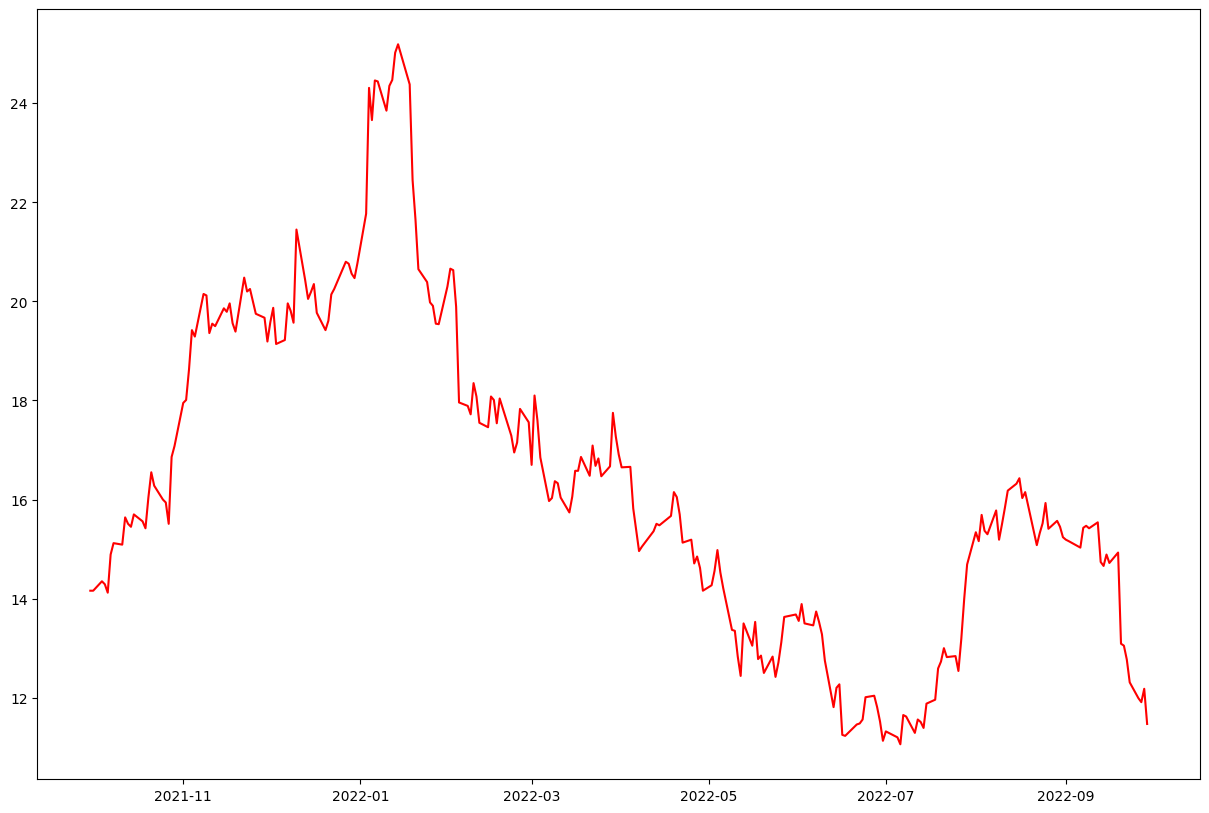

In [90]:
#Plot historical price data for each stock

fig,ax = plt.subplots(figsize=(15,10))
ax.plot(final_df['Date'], final_df['Close'], color='red', label='Close Price')

In [91]:
#adding techinacal indicators 

def get_tech_ind(data):
    data['MA7'] = data.iloc[:,4].rolling(window=7).mean() 
    data['MA20'] = data.iloc[:,4].rolling(window=20).mean() 

    data['MACD'] = data.iloc[:,4].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()
    #This is the difference of Closing price and Opening Price

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 4].rolling(20).std()
    data['upper_band'] = data['MA20'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA20'] - (data['20SD'] * 2)

    # Create Exponential moving average
    data['EMA'] = data.iloc[:,4].ewm(com=0.5).mean()

    # Create LogMomentum
    data['logmomentum'] = np.log(data.iloc[:,4] - 1)

    return data

In [92]:
tech_df = get_tech_ind(final_df)
dataset = tech_df.iloc[20:,:].reset_index(drop=True)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,sentiment_score,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2021-10-28,16.860001,17.580000,16.709999,16.860001,16.245878,215237600,0.235083,16.168572,15.4240,-0.234482,0.775401,16.974802,13.873199,16.463610,2.763800
1,2021-10-29,16.860001,17.360001,16.549999,17.080000,16.457863,100560700,0.174896,16.317143,15.5700,-0.253691,0.799408,17.168815,13.971185,16.874537,2.777576
2,2021-11-01,17.500000,17.969999,17.070000,17.950001,17.296175,125246500,0.233686,16.517143,15.7500,-0.284557,0.908150,17.566301,13.933699,17.591513,2.830268
3,2021-11-02,18.150000,18.190001,17.730000,18.010000,17.353991,115146200,0.186974,16.764286,15.9360,-0.395601,0.972086,17.880173,13.991828,17.870504,2.833801
4,2021-11-03,17.920000,18.830000,17.879999,18.629999,17.951405,104755500,0.188404,17.140000,16.1615,-0.390896,1.048730,18.258960,14.064040,18.376834,2.869602


In [94]:
dataset.shape

(232, 16)

In [95]:
def tech_ind(dataset):
    fig,ax = plt.subplots(figsize=(15, 8), dpi = 200)
    x_ = range(3, dataset.shape[0])
    x_ = list(dataset.index)

    ax.plot(dataset['Date'], dataset['MA7'], label='Moving Average (7 days)', color='g', linestyle='--')
    ax.plot(dataset['Date'], dataset['Close'], label='Closing Price', color='#6A5ACD')
    ax.plot(dataset['Date'], dataset['MA20'], label='Moving Average (20 days)', color='r', linestyle='-.')
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    plt.title('Technical indicators')
    plt.ylabel('Close (USD)')
    plt.xlabel("Year")
    plt.legend()

    plt.show()

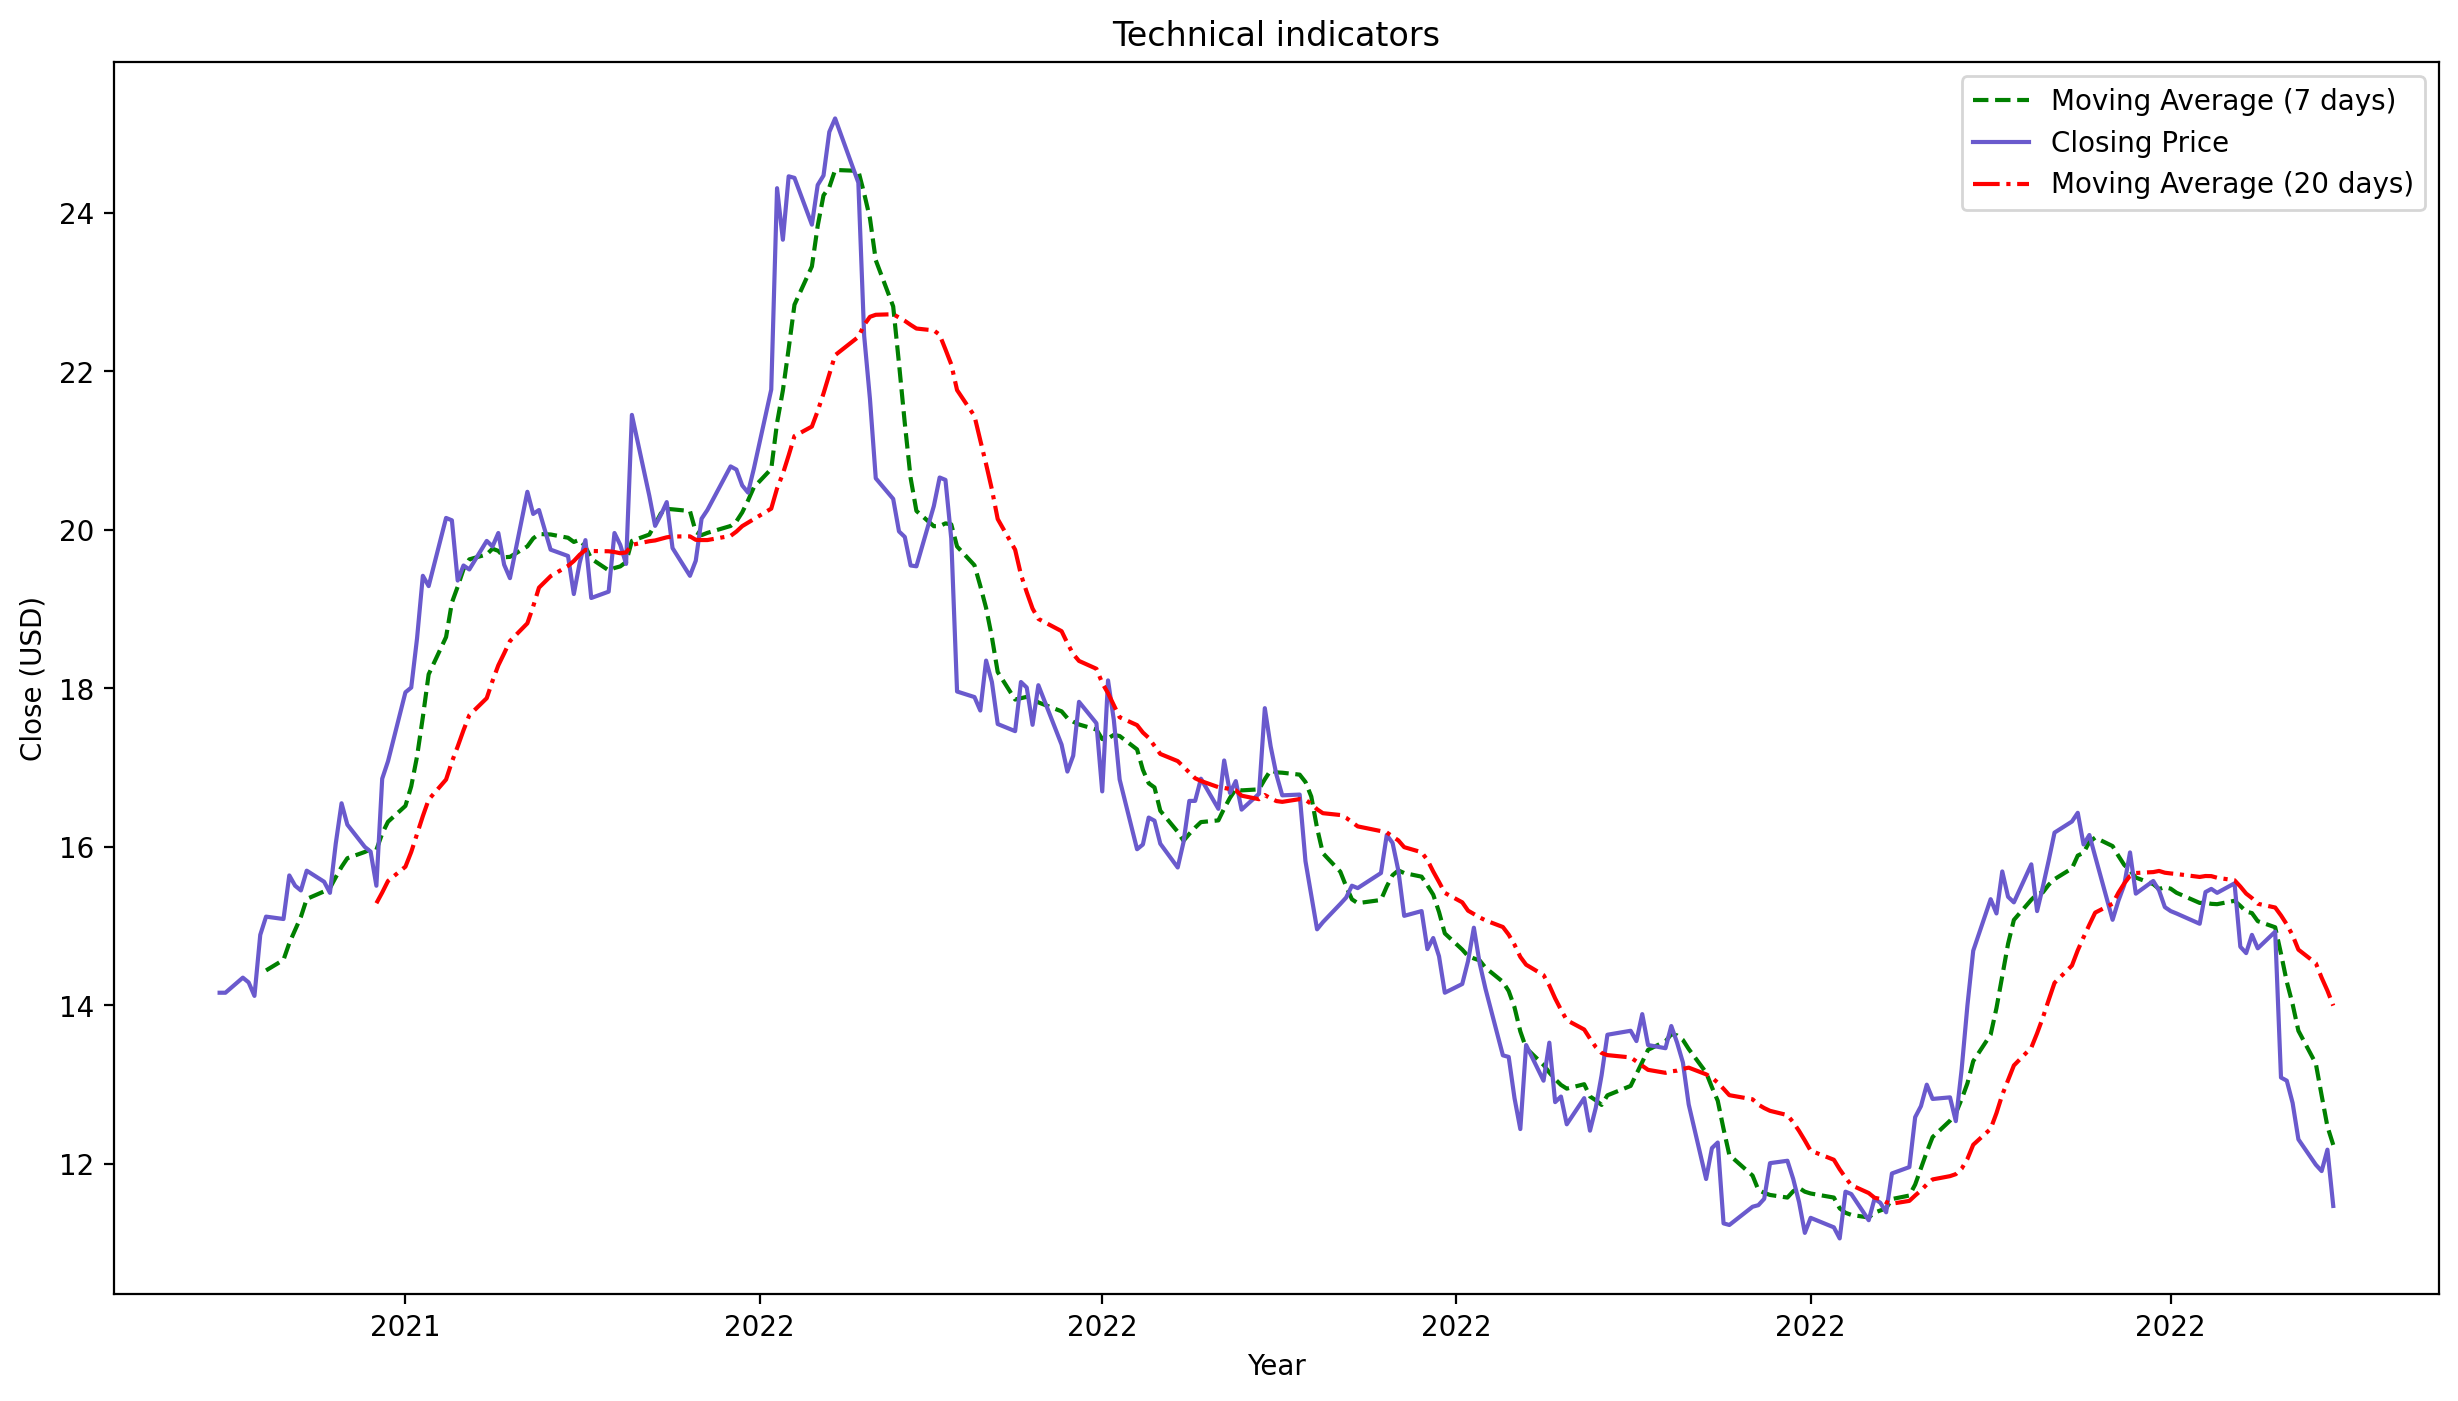

In [96]:
tech_ind(tech_df)

In [97]:
dataset.iloc[:, 1:] = pd.concat([dataset.iloc[:, 1:].ffill()])


In [98]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,sentiment_score,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2021-10-28,16.860001,17.580000,16.709999,16.860001,16.245878,215237600,0.235083,16.168572,15.4240,-0.234482,0.775401,16.974802,13.873199,16.463610,2.763800
1,2021-10-29,16.860001,17.360001,16.549999,17.080000,16.457863,100560700,0.174896,16.317143,15.5700,-0.253691,0.799408,17.168815,13.971185,16.874537,2.777576
2,2021-11-01,17.500000,17.969999,17.070000,17.950001,17.296175,125246500,0.233686,16.517143,15.7500,-0.284557,0.908150,17.566301,13.933699,17.591513,2.830268
3,2021-11-02,18.150000,18.190001,17.730000,18.010000,17.353991,115146200,0.186974,16.764286,15.9360,-0.395601,0.972086,17.880173,13.991828,17.870504,2.833801
4,2021-11-03,17.920000,18.830000,17.879999,18.629999,17.951405,104755500,0.188404,17.140000,16.1615,-0.390896,1.048730,18.258960,14.064040,18.376834,2.869602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2022-09-23,12.330000,12.440000,11.950000,12.310000,12.182656,104043700,0.163135,13.680000,14.7035,0.404937,1.022624,16.748749,12.658251,12.517957,2.425687
228,2022-09-26,12.210000,12.380000,11.930000,11.990000,11.865966,89300400,0.120966,13.265715,14.5325,0.506224,1.173133,16.878766,12.186234,12.165986,2.396986
229,2022-09-27,12.210000,12.220000,11.660000,11.910000,11.786794,87044400,0.219417,12.864286,14.3495,0.571378,1.283086,16.915672,11.783328,11.995328,2.389680
230,2022-09-28,11.910000,12.240000,11.760000,12.180000,12.054001,72701600,0.133114,12.471429,14.1860,0.678648,1.342442,16.870885,11.501115,12.118443,2.414126


In [99]:
datetime_series = pd.to_datetime(dataset['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='Date')
dataset = dataset.drop(columns='Date')

In [101]:
datetime_series,datetime_index

(0     2021-10-28
 1     2021-10-29
 2     2021-11-01
 3     2021-11-02
 4     2021-11-03
          ...    
 227   2022-09-23
 228   2022-09-26
 229   2022-09-27
 230   2022-09-28
 231   2022-09-29
 Name: Date, Length: 232, dtype: datetime64[ns],
 DatetimeIndex(['2021-10-28', '2021-10-29', '2021-11-01', '2021-11-02',
                '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-08',
                '2021-11-09', '2021-11-10',
                ...
                '2022-09-16', '2022-09-19', '2022-09-20', '2022-09-21',
                '2022-09-22', '2022-09-23', '2022-09-26', '2022-09-27',
                '2022-09-28', '2022-09-29'],
               dtype='datetime64[ns]', length=232, freq=None))

In [102]:
def normalize_data(df, range, target_column):

    target_df_series = pd.DataFrame(df[target_column])
    data = pd.DataFrame(df.iloc[:, :])

    X_scaler = MinMaxScaler(feature_range=range)
    y_scaler = MinMaxScaler(feature_range=range)
    X_scaler.fit(data)
    y_scaler.fit(target_df_series)

    X_scale_dataset = X_scaler.fit_transform(data)
    y_scale_dataset = y_scaler.fit_transform(target_df_series)
    
    dump(X_scaler, open('X_scaler.pkl', 'wb'))
    dump(y_scaler, open('y_scaler.pkl', 'wb'))

    return (X_scale_dataset,y_scale_dataset)

In [103]:
def batch_data(x_data,y_data, batch_size, predict_period):
    X_batched, y_batched, yc = list(), list(), list()

    for i in range(0,len(x_data),1):
        x_value = x_data[i: i + batch_size][:, :]
        y_value = y_data[i + batch_size: i + batch_size + predict_period][:, 0]
        yc_value = y_data[i: i + batch_size][:, :]
        if len(x_value) == batch_size and len(y_value) == predict_period:
            X_batched.append(x_value)
            y_batched.append(y_value)
            yc.append(yc_value)

    return np.array(X_batched), np.array(y_batched), np.array(yc)

In [104]:
def split_train_test(data):
    train_size = len(data) - 20
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

In [105]:
def predict_index(dataset, X_train, batch_size, prediction_period):
    train_predict_index = dataset.iloc[batch_size: X_train.shape[0] + batch_size + prediction_period, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + batch_size:, :].index

    return train_predict_index, test_predict_index

In [106]:
X_scale_dataset,y_scale_dataset = normalize_data(dataset, (-1,1), "Close")
X_batched, y_batched, yc = batch_data(X_scale_dataset, y_scale_dataset, batch_size = 5, predict_period = 1)
print("X shape:", X_batched.shape)
print("y shape:", y_batched.shape)
print("yc shape:", yc.shape)

X_train, X_test, = split_train_test(X_batched)
y_train, y_test, = split_train_test(y_batched)
yc_train, yc_test, = split_train_test(yc)
index_train, index_test, = predict_index(dataset, X_train, 5, 1)

X shape: (227, 5, 15)
y shape: (227, 1)
yc shape: (227, 5, 1)


In [107]:
input_dim = X_train.shape[1] 
feature_size = X_train.shape[2] 
output_dim = y_train.shape[1]

In [110]:
input_dim,feature_size,output_dim

(5, 15, 1)

In [111]:
#build GAN model 

In [112]:
def make_generator_model(input_dim,output_dim,feature_size):
    model =tf.keras.Sequential([LSTM(units= 1024, return_sequences=True, input_shape=(input_dim, feature_size)),LSTM(units = 512, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 256, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 128, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 64, recurrent_dropout = 0.3),
                               Dense(32),
                               Dense(16),
                               Dense(8),
                               Dense(units=output_dim)])
    return model

In [113]:
def make_discriminator_model(input_dim):
    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(8,input_shape=(input_dim+1,1),kernel_size=3,strides =2,padding = 'same',activation='relu'))
    cnn_net.add(Conv1D(16,kernel_size=3,strides =2,padding = 'same',activation='relu'))
    cnn_net.add(Conv1D(32,kernel_size=3,strides =2,padding = 'same',activation='relu'))
    cnn_net.add(Conv1D(64,kernel_size=3,strides =2,padding = 'same',activation='relu'))
    cnn_net.add(Conv1D(128,kernel_size=3,strides =2,padding = 'same',activation='relu'))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220,use_bias = False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220,use_bias = False,activation = 'relu'))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(1,activation = 'sigmoid'))
    return cnn_net

In [114]:
def discriminator_loss(real_output,fake_output):
    loss_f = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    real_loss = loss_f(tf.ones_like(real_output),real_output)
    fake_loss = loss_f(tf.zeros_like(fake_output),fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [115]:
def generator_loss(fake_output):
    loss_f = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    return loss_f(tf.ones_like(fake_output),fake_output)

In [116]:
@tf.function

def train_step(real_x, real_y, yc, generator, discriminator, g_optimizer, d_optimizer):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_data = generator(real_x, training=True)
        generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
        d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
        real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
        d_real_input = tf.concat([real_y_reshape, yc], axis=1)

        real_output = discriminator(d_real_input, training=True)
        fake_output = discriminator(d_fake_input, training=True)

        g_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(g_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    g_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    d_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': g_loss}

In [117]:
def train(real_x, real_y, yc, Epochs, generator, discriminator, g_optimizer, d_optimizer, checkpoint = 50):
    train_info = {}
    train_info["discriminator_loss"] = []
    train_info["generator_loss"] = []

    for epoch in tqdm(range(Epochs)):
        real_price, fake_price, loss = train_step(real_x, real_y, yc, generator, discriminator, g_optimizer, d_optimizer)
        G_losses = []
        D_losses = []
        Real_price = []
        Predicted_price = []
        D_losses.append(loss['d_loss'].numpy())
        G_losses.append(loss['g_loss'].numpy())
        Predicted_price.append(fake_price.numpy())
        Real_price.append(real_price.numpy())

        #Save model every X checkpoints
        if (epoch + 1) % checkpoint == 0:
            tf.keras.models.save_model(generator, f'./models_gan/{stock_name}/generator_V_%d.h5' % epoch)
            tf.keras.models.save_model(discriminator, f'./models_gan/{stock_name}/discriminator_V_%d.h5' % epoch)
            print('epoch', epoch + 1, 'discriminator_loss', loss['d_loss'].numpy(), 'generator_loss', loss['g_loss'].numpy())
    
        train_info["discriminator_loss"].append(D_losses)
        train_info["generator_loss"].append(G_losses)
  
    Predicted_price = np.array(Predicted_price)
    Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
    Real_price = np.array(Real_price)
    Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

    plt.subplot(2,1,1)
    plt.plot(train_info["discriminator_loss"], label='Disc_loss', color='#000000')
    plt.xlabel('Epoch')
    plt.ylabel('Discriminator Loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(train_info["generator_loss"], label='Gen_loss', color='#000000')
    plt.xlabel('Epoch')
    plt.ylabel('Generator Loss')
    plt.legend()

    plt.show()

    return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(Real_price)

In [118]:
def plot_results(Real_price, Predicted_price, index_train):
    X_scaler = load(open('/content/X_scaler.pkl', 'rb'))
    y_scaler = load(open('/content/y_scaler.pkl', 'rb'))
    train_predict_index = index_train

    rescaled_Real_price = y_scaler.inverse_transform(Real_price)
    rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

    predict_result = pd.DataFrame()
    for i in range(rescaled_Predicted_price.shape[0]):
        y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
  
    real_price = pd.DataFrame()
    for i in range(rescaled_Real_price.shape[0]):
        y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)
  
    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color = 'r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training", fontsize=20)
    plt.show()

    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis = 1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- Train RMSE -- ', RMSE)

In [119]:


@tf.function 

def eval_op(generator, real_x):
    generated_data = generator(real_x, training = False)

    return generated_data

In [120]:
def plot_test_data(Real_test_price, Predicted_test_price, index_test):
    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = index_test

    rescaled_Real_price = y_scaler.inverse_transform(Real_test_price)
    rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_test_price)

    predict_result = pd.DataFrame()
    for i in range(rescaled_Predicted_price.shape[0]):
        y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=test_predict_index[i:i+output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
  
    real_price = pd.DataFrame()
    for i in range(rescaled_Real_price.shape[0]):
        y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=test_predict_index[i:i+output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)
  
    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis = 1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('Test RMSE: ', RMSE)
    
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"], color='#00008B')
    plt.plot(predict_result["predicted_mean"], color = '#8B0000', linestyle='--')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title(f"Prediction on test data for {stock_name}", fontsize=20)
    plt.show()


In [121]:

learning_rate = 5e-4
epochs = 500

g_optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
d_optimizer = tf.keras.optimizers.Adam(lr = learning_rate)

generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])
discriminator = make_discriminator_model(X_train.shape[1])

In [137]:
!pip install pydot --user 

DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [138]:
from tensorflow.keras.utils import plot_model

In [139]:
tf.keras.utils.plot_model(generator,to_file='generator_keras_model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [135]:
plot_model(generator, to_file='generator_keras_model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
tf.keras.utils.plot_model(discriminator, to_file='discriminator_keras_model.png', show_shapes=True)

 10%|▉         | 49/500 [00:46<04:12,  1.79it/s] 

epoch 50 discriminator_loss 

 10%|█         | 50/500 [00:47<04:36,  1.63it/s]

1.3863378 generator_loss 0.69855636


 20%|█▉        | 99/500 [01:22<05:12,  1.28it/s]

 20%|██        | 100/500 [01:23<05:35,  1.19it/s]

epoch 100 discriminator_loss 1.3893127 generator_loss 0.67367965


 30%|██▉       | 149/500 [02:01<04:21,  1.34it/s]

epoch

 30%|███       | 150/500 [02:02<04:43,  1.24it/s]

 150 discriminator_loss 1.3684766 generator_loss 0.69402826


 40%|███▉      | 199/500 [02:47<05:34,  1.11s/it]

 40%|████      | 200/500 [02:48<05:27,  1.09s/it]

epoch 200 discriminator_loss 1.3861219 generator_loss 0.7038654


 50%|████▉     | 249/500 [03:45<05:01,  1.20s/it]

 50%|█████     | 250/500 [03:46<05:21,  1.29s/it]

epoch 250 discriminator_loss 1.3870623 generator_loss 0.6892828


 60%|█████▉    | 299/500 [04:43<03:33,  1.06s/it]

 60%|██████    | 300/500 [04:44<03:36,  1.08s/it]

epoch 300 discriminator_loss 1.3888545 generator_loss 0.69801635


 70%|██████▉   | 349/500 [05:33<02:34,  1.02s/it]

 70%|███████   | 350/500 [05:34<02:48,  1.13s/it]

epoch 350 discriminator_loss 1.3814394 generator_loss 0.7300138


 80%|███████▉  | 399/500 [06:25<01:46,  1.06s/it]

 80%|████████  | 400/500 [06:26<01:48,  1.08s/it]

epoch 400 discriminator_loss 1.388246 generator_loss 0.6894249


 90%|████████▉ | 449/500 [07:07<00:33,  1.53it/s]

 90%|█████████ | 450/500 [07:08<00:38,  1.30it/s]

epoch 450 discriminator_loss 1.3877178 generator_loss 0.6556776


100%|█████████▉| 499/500 [07:43<00:00,  1.46it/s]

100%|██████████| 500/500 [07:44<00:00,  1.08it/s]

epoch 500 discriminator_loss 1.3867999 generator_loss 0.6925659


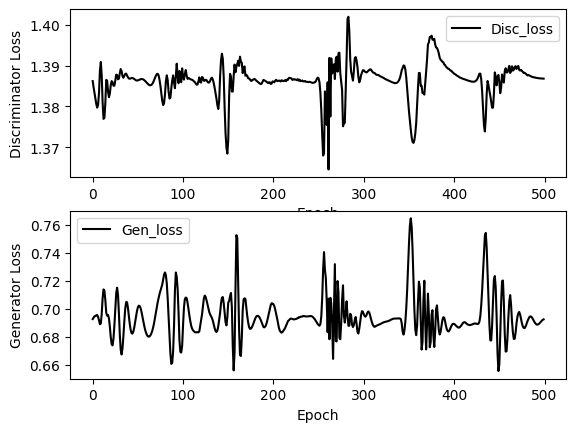

In [140]:
#train and test model 

predicted_price, real_price, RMSPE = train(X_train, y_train, yc_train, epochs, generator, discriminator, g_optimizer, d_optimizer)

In [141]:
test_generator = tf.keras.models.load_model(f'./models_gan/{stock_name}/generator_V_{epochs-1}.h5')

Test RMSE:  0.8569711524568914


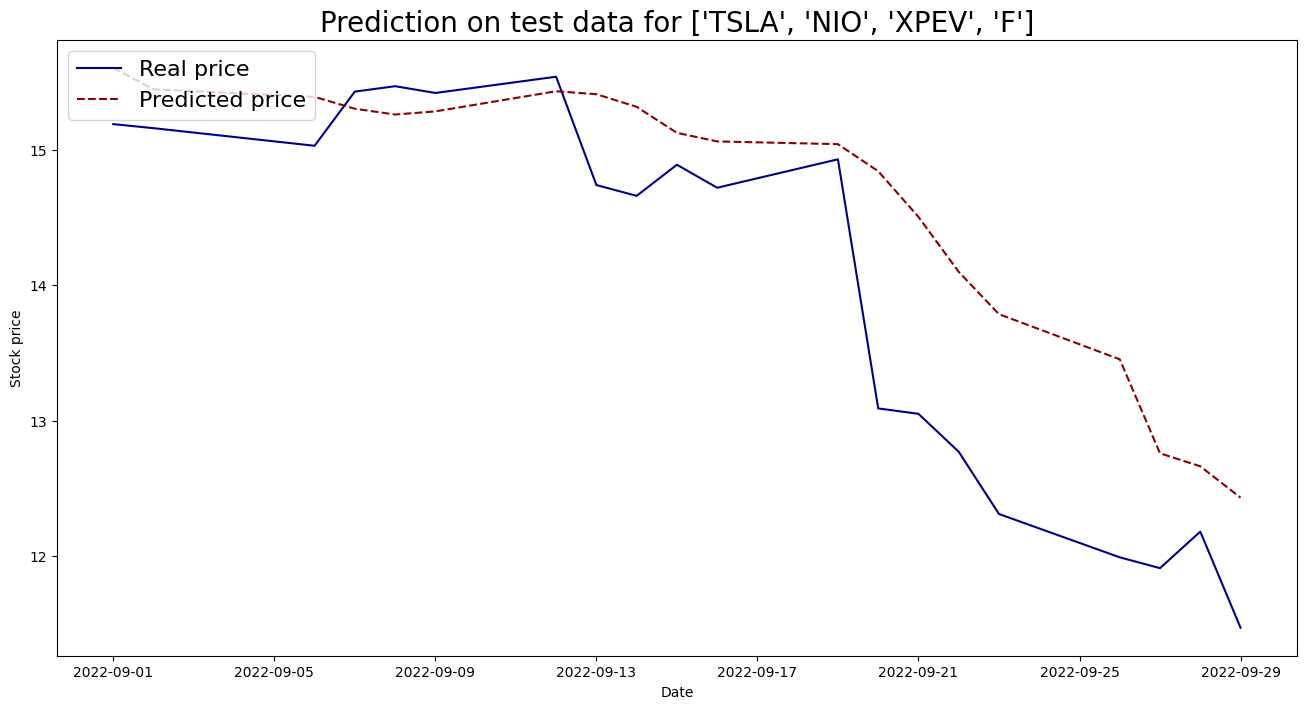

In [142]:
#PREDICTTHE TEST DATA
predicted_test_data = eval_op(test_generator, X_test)
plot_test_data(y_test, predicted_test_data,index_test)